In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from PIL import Image
import matplotlib as mpl
import matplotlib.patheffects
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.image as mpimg
from mplsoccer import Pitch, add_image
from adjustText import adjust_text
from highlight_text import htext
from pywaffle import Waffle
import math
import warnings
warnings.filterwarnings('ignore')

In [104]:
nList = []

def controlYRange(passDf, yrange):
    passDf = passDf[(passDf["x"] > yrange)&(passDf["endX"] > yrange)]
    return passDf
    
yrange = 62.5
season = "2122"
for num in range(1,4):
    print(num)
    df = pd.read_csv(f"/work/assets/whoscored/barcelona/match/{season}/eventsData/{season}#{num}.csv")
    player = pd.read_csv(f"/work/assets/whoscored/barcelona/ids/player_id2122.csv")
    
    
    df = df[df["teamId"]==65]
    try:
        passDf = df[df["type.displayName"] == "Pass"]
    except:
        passDf = df[df["type"] == "{'value': 1, 'displayName': 'Pass'}"]
        
    passDf = controlYRange(passDf,yrange=yrange)
#     passDfSuc = passDf[passDf["outcomeType.displayName"]=="Successful"]
    passDfSuc = passDf

    player = player.set_index("playerId")
    passDfSuc["playerName"] = [player.to_dict()["playerName"][int(i)] for i in list(passDfSuc["playerId"])]    
    passDfSuc.reset_index(inplace=True, drop=True)  

    passDfSuc["receiverId"] = passDfSuc["playerId"].shift(-1)
    passDfSuc["receiverName"] = passDfSuc["playerName"].shift(-1)
    
    passDfSuc.dropna(subset=["receiverName"],inplace=True)
    
    net = passDfSuc[["id","playerName","receiverName"]]
    n = net.groupby(["playerName","receiverName"],as_index=False).count()
    n.set_index(keys="playerName",drop=True,inplace=True)
    nList.append(n)

1
2
3


In [105]:
nList[0].index.unique()
nList[0]["id"]
# nList[0].loc["Ansu Fati"]["id"]

playerName
Antoine Griezmann    2
Antoine Griezmann    1
Antoine Griezmann    4
Antoine Griezmann    1
Antoine Griezmann    1
                    ..
Sergiño Dest         3
Sergiño Dest         1
Sergiño Dest         1
Sergiño Dest         1
Sergiño Dest         1
Name: id, Length: 65, dtype: int64

In [108]:
DICT = {}

for num in range(3):
    for NAME in nList[num].index.unique():
        try:
            for i, name in enumerate(nList[num].loc[NAME,"receiverName"].tolist()):
                if not NAME in DICT.keys():
                    DICT[NAME] = {}
                if not name in DICT[NAME].keys():
                    DICT[NAME][name] = 0

                DICT[NAME][name] += nList[num].loc[NAME]["id"][i]
        except:
            print(NAME,num)

Gerard Piqué 0
Eric García 1


In [109]:
df = pd.DataFrame(DICT)
df = df.fillna(0)

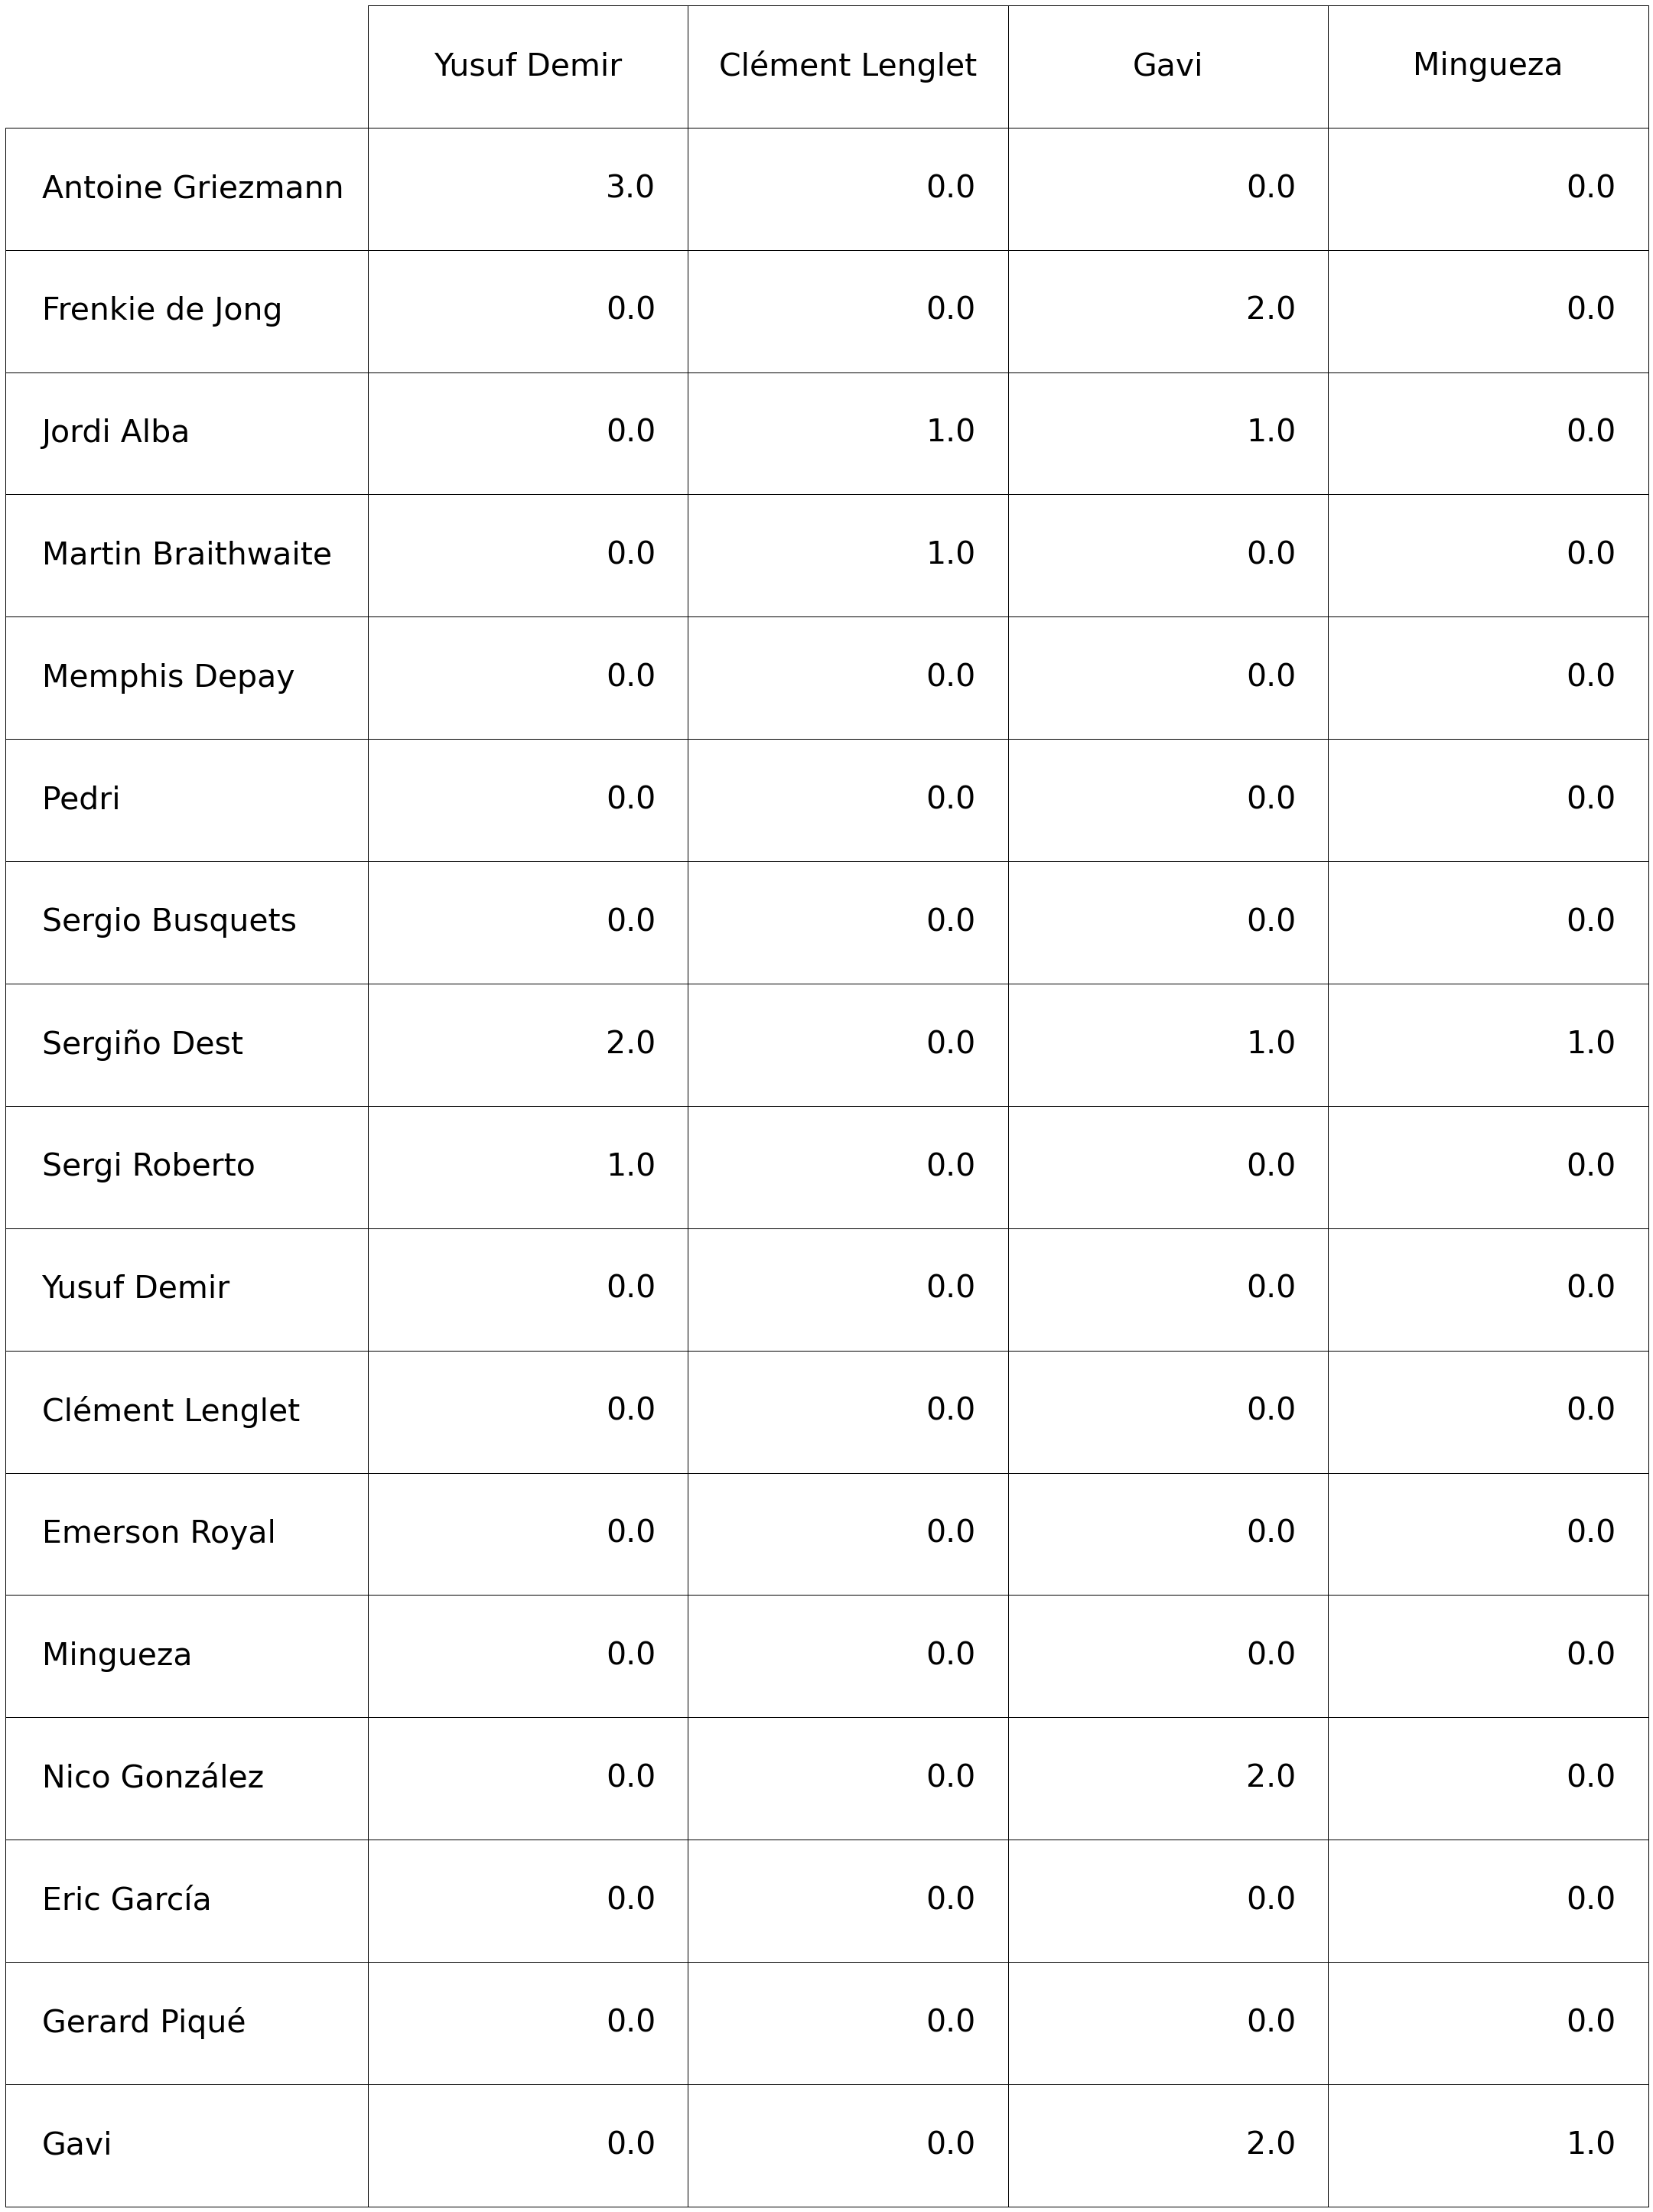

In [110]:
fig, ax = plt.subplots(figsize=(25,25))
ax.axis('off')

tbl = ax.table(cellText=np.round(df.iloc[:,12:].values,2),
             colLabels=df.columns[12:],
             rowLabels=df.index,
             loc='center',
#              bbox=[0,0,1,1]
              )
tbl.auto_set_font_size(False)
tbl.set_fontsize(41)

cell_dict = tbl.get_celld()
for i in range(len(df.columns[12:])):
    for j in range(len(df.index)+1):
        cell_dict[(j,i)].set_width(0.3)

for pos, cell in tbl.get_celld().items():
    cell.set_height(2/len(df))
    

# plt.savefig('/work/output/barcelona/passTable20_2.png', 
#             dpi=100, bbox_inches="tight",facecolor='#F8F8FF')

In [121]:
df.sum(axis=1)

Antoine Griezmann     34.0
Frenkie de Jong       40.0
Jordi Alba            87.0
Martin Braithwaite    17.0
Memphis Depay         58.0
Pedri                 31.0
Sergio Busquets       23.0
Sergiño Dest          19.0
Sergi Roberto         14.0
Yusuf Demir            6.0
Clément Lenglet        2.0
Emerson Royal         13.0
Mingueza               2.0
Nico González          8.0
Eric García            9.0
Gerard Piqué           1.0
Gavi                   8.0
dtype: float64

In [120]:
print(34.0/2.9)
print(40.0/2.8)
print(17.0/2.9)
print(58.0/3) 
print(23.0/2.9)
print(87.0/3)
print(31.0/1.7)
print(17/2.5)

11.724137931034484
14.285714285714286
5.862068965517242
19.333333333333332
7.931034482758621
29.0
18.235294117647058
6.8


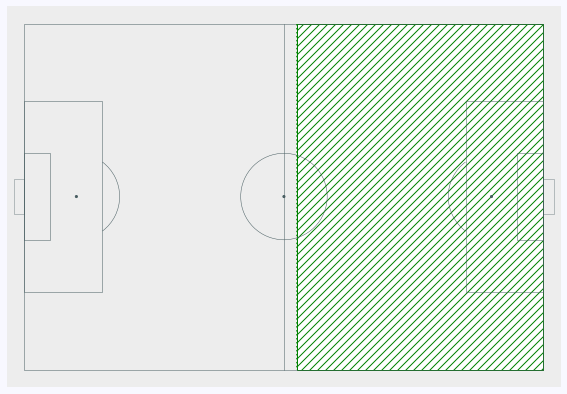

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from PIL import Image
from imageio import imread

import matplotlib as mpl
import matplotlib.patheffects
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.image as mpimg
from mplsoccer import Pitch, add_image
from adjustText import adjust_text
from highlight_text import htext
from pywaffle import Waffle
# from scraype import FbrefScrayper
import os
from skimage.transform import resize


text_color = '#CECECD'
background_color = "#F8F8FF"
scatter_color = '#D7B013'
secondary_color = '#C0C0C0'
mpl.rcParams['xtick.color'] = '#131313'
mpl.rcParams['ytick.color'] = '#131313'

# image = Image.open(f'/work/assets/image/barcelona_small2.png').convert('P')
# logo = image.copy()
# logo.putalpha(100)

# im = imread(os.path.join('/work/assets/image/','barcelona_small2.png'))
# im = resize(im, (128, 125))
# fig.figimage(im, 210, 328, alpha=.5)

fig, ax = plt.subplots(figsize=(10,7),facecolor='#f8f8ff')
pitch = Pitch(
    pitch_type='statsbomb',
    goal_type = 'box',
    pitch_color = '#ededed',
    line_color = '#495E62', 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)
pitch.draw(ax=ax)


# image = Image.open('/work/assets/image/barcelona.png')
# alpha = Image.new("L", image.size, 70)
# ax_image = fig.add_axes((0.264, 0.245, 0.5, 0.5))
# ax_image.axis('off')
# image.putalpha(alpha)
# ax_image.imshow(image)

# alpha = Image.new("L", logo.size, 10)
# ax_image = fig.add_axes((.23, 0.23, 0.58, 0.58))
# ax_image.axis('off')
# logo.putalpha(alpha)
# ax_image.imshow(logo)

plt.gca().plot((63,63),(0,80),"green",linestyle = ":")
x = np.array([63, 63, 120])
y = np.array([0, 80, 80])
# y2 = np.array([80, 0])

plt.gca().fill_between(x,y,color="green",fc="white",hatch="///")



plt.savefig('/work/output/barcelona/field75.png', 
            dpi=100, bbox_inches="tight",facecolor='#F8F8FF')

In [242]:
# df = pd.read_csv("/work/assets/whoscored/barcelona/match/2122/eventsData/2122#4.csv")
df = pd.read_csv("/work/assets/whoscored/barcelona/match/2021/2021#30.csv")

In [243]:
df["x"] = df["x"]*1.2
df["y"] = df["y"]*0.8

In [244]:
df65 = df[df["teamId"]==65]
df65.reset_index(inplace=True,drop=True)

df65[df65["isGoal"]==True]

,Unnamed: 0,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,...,goalMouthY,isShot,cardType.value,cardType.displayName,isGoal,blockedX,blockedY,isOwnGoal,venue,opponent
111,151,2.289918e+09,118,7,35.0,65,104.16,50.16,7,"[{'type': {'value': 154, 'displayName': 'Inten...",...,47.0,True,NaN,NaN,True,NaN,NaN,NaN,Camp Nou,Getafe
125,185,2.289920e+09,137,11,40.0,65,5.28,41.20,11,"[{'type': {'value': 16, 'displayName': 'SmallB...",...,49.2,True,NaN,NaN,True,NaN,NaN,True,Camp Nou,Getafe
419,594,2.289927e+09,447,32,57.0,65,118.68,32.80,32,"[{'type': {'value': 24, 'displayName': 'SetPie...",...,49.3,True,NaN,NaN,True,NaN,NaN,NaN,Camp Nou,Getafe
1149,1619,2.289939e+09,1219,86,14.0,65,115.92,36.48,88,"[{'type': {'value': 81, 'displayName': 'HighRi...",...,47.2,True,NaN,NaN,True,NaN,NaN,NaN,Camp Nou,Getafe
1202,1698,2.289939e+09,1276,92,27.0,65,106.20,39.92,94,"[{'type': {'value': 178, 'displayName': 'Stand...",...,45.3,True,NaN,NaN,True,NaN,NaN,NaN,Camp Nou,Getafe


In [253]:
df_2 = df65.iloc[100:112][["eventId","teamId","qualifiers","isGoal","type.displayName","x","y","endX","endY"]]
df_2.loc[111,"endX"] = 120
df_2.loc[111,"endY"] = 40

df_3 = df65.iloc[400:420][["eventId","teamId","qualifiers","isGoal","type.displayName","x","y","endX","endY"]]
df_3.loc[419,"endX"] = 120
df_3.loc[419,"endY"] = 40

# df_4 = df65.iloc[700:726][["eventId","teamId","qualifiers","isGoal","type.displayName","x","y","endX","endY"]]
# df_4.loc[725,"endX"] = 120
# df_4.loc[725,"endY"] = 40

In [254]:
# df.dropna(subset=["endX","endY"],inplace=True)
df_3.reset_index(inplace=True)
df_3.tail(30)

,index,eventId,teamId,qualifiers,isGoal,type.displayName,x,y,endX,endY
0,400,427,65,[],NaN,BallRecovery,32.40,7.04,NaN,NaN
1,401,428,65,"[{'type': {'value': 56, 'displayName': 'Zone'}...",NaN,Pass,36.72,5.20,24.4,24.7
2,402,429,65,"[{'type': {'value': 141, 'displayName': 'PassE...",NaN,Pass,29.16,20.16,36.8,39.5
3,403,430,65,"[{'type': {'value': 213, 'displayName': 'Angle...",NaN,Pass,47.04,32.24,56.3,30.3
4,404,431,65,"[{'type': {'value': 140, 'displayName': 'PassE...",NaN,Pass,73.08,21.12,66.8,13.5
5,405,432,65,"[{'type': {'value': 286, 'displayName': 'Offen...",NaN,TakeOn,110.40,13.44,NaN,NaN
6,406,433,65,"[{'type': {'value': 233, 'displayName': 'Oppos...",NaN,CornerAwarded,115.68,14.80,NaN,NaN
7,407,434,65,"[{'type': {'value': 212, 'displayName': 'Lengt...",NaN,Pass,119.40,0.40,91.4,4.6
8,408,435,65,"[{'type': {'value': 141, 'displayName': 'PassE...",NaN,Pass,108.84,4.88,72.2,21.8
9,409,436,65,"[{'type': {'value': 140, 'displayName': 'PassE...",NaN,Pass,86.52,16.72,80.6,8.9


In [255]:
df = df_3.iloc[6:,:]
df

,index,eventId,teamId,qualifiers,isGoal,type.displayName,x,y,endX,endY
6,406,433,65,"[{'type': {'value': 233, 'displayName': 'Oppos...",NaN,CornerAwarded,115.68,14.80,NaN,NaN
7,407,434,65,"[{'type': {'value': 212, 'displayName': 'Lengt...",NaN,Pass,119.40,0.40,91.4,4.6
8,408,435,65,"[{'type': {'value': 141, 'displayName': 'PassE...",NaN,Pass,108.84,4.88,72.2,21.8
9,409,436,65,"[{'type': {'value': 140, 'displayName': 'PassE...",NaN,Pass,86.52,16.72,80.6,8.9
10,410,438,65,"[{'type': {'value': 233, 'displayName': 'Oppos...",NaN,Foul,111.12,13.76,NaN,NaN
11,411,439,65,"[{'type': {'value': 72, 'displayName': 'LeftFo...",NaN,Pass,116.28,14.80,98.6,48.7
12,412,440,65,"[{'type': {'value': 15, 'displayName': 'Head'}...",NaN,BallTouch,104.64,53.12,NaN,NaN
13,413,441,65,"[{'type': {'value': 3, 'displayName': 'HeadPas...",NaN,Pass,104.64,48.72,90.9,61.1
14,414,442,65,"[{'type': {'value': 233, 'displayName': 'Oppos...",NaN,Aerial,92.88,35.84,NaN,NaN
15,415,443,65,"[{'type': {'value': 212, 'displayName': 'Lengt...",NaN,Pass,93.12,36.16,81.5,38.2


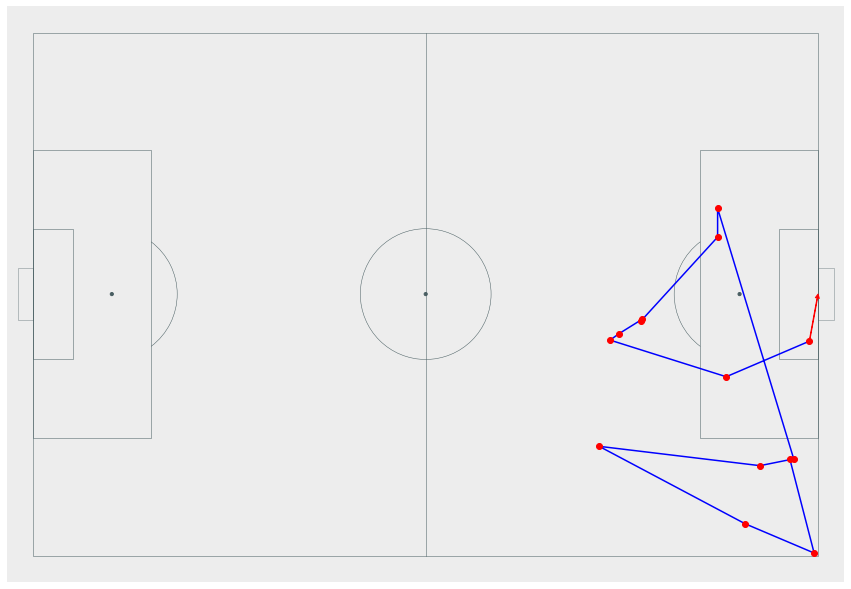

In [256]:
fig,ax = plt.subplots(figsize=(15,14))

pitch = Pitch(
    pitch_type='statsbomb',
    goal_type = 'box',
    pitch_color = '#ededed',
    line_color = '#495E62', 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)
pitch.draw(ax=ax)
ax.invert_yaxis()

ax.plot(df["x"],df["y"],color='b',alpha = 1)
ax.annotate("",xy=(120,40),xytext=df.iloc[-1][["x","y"]],arrowprops=dict(alpha=1,width=0.5,headlength=4.0,headwidth=4.0,color="red"),annotation_clip=False)

for idx,row in df.iterrows():

    ax.plot(row["x"],row["y"],color='r',marker="o",alpha = 1)
#     ax.annotate("",xy=row[["endX","endY"]],xytext=row[["x","y"]],arrowprops=dict(alpha=1,width=0.5,headlength=4.0,headwidth=4.0,color="red"),annotation_clip=False)

plt.savefig('/work/output/barcelona/goal11.png', 
            dpi=100, bbox_inches="tight",facecolor='#F8F8FF')

In [2]:
print(121/4.8)
print(723/28.9)
print(806/35)
print(1261/33.6)
print(1434/33.6)
print(293/7.3)
print(715/28)
print(858/26.8)
print(667/19.7)

25.208333333333336
25.017301038062286
23.02857142857143
37.529761904761905
42.67857142857142
40.136986301369866
25.535714285714285
32.014925373134325
33.85786802030457
